# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 5__

__Nombres de los estudiantes: Belén Sánchez Centeno y Martín Fernández de Diego__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

In [17]:
RANDOM_STATE = 666

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

## 1) Carga del conjunto de datos

**Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`.**

In [19]:
cleveland = 'cleveland.csv'
dataframe = pd.read_csv(cleveland)

**Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:**  
```python df['sex'] = df['sex'].astype('category')```

In [20]:
dataframe['sex'] = dataframe['sex'].astype('category')
dataframe['cp'] = dataframe['cp'].astype('category')
dataframe['fbs'] = dataframe['fbs'].astype('category')
dataframe['restecg'] = dataframe['restecg'].astype('category')
dataframe['exang'] = dataframe['exang'].astype('category')
dataframe['slope'] = dataframe['slope'].astype('category')
dataframe['ca'] = dataframe['ca'].astype('category')
dataframe['thal'] = dataframe['thal'].astype('category')
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


**En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.**

In [21]:
dataframe.loc[dataframe['target'] == 0, 'new_target'] = 'normal'
dataframe.loc[dataframe['target'] > 0, 'new_target'] = 'enfermo'
dataframe['target'] = dataframe['new_target']
dataframe = dataframe.drop(['new_target'],axis=1)
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,enfermo


**Elimina los pacientes que tengan datos incompletos.**

In [22]:
dataframe = dataframe.dropna()
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


## 2) Análisis de los datos

**Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.**

In [23]:
dataframe['target'].value_counts()

normal     160
enfermo    137
Name: target, dtype: int64

Las clases no están completamente equilibradas pero, en relación al conjunto de datos, la diferencia entre enfermos y sanos no es significativamente grande como para necesitar un aumento en la población del estudio.  
En este caso, la tasa de enfermos es del 46%. Por lo tanto, un clasificador naïve no nos arrojaría buenos resultados.

**Comprueba los rangos y distribuciones de las variables numéricas.**

Variables numéricas: `age`, `trestbps`, `chol`, `thalach`, `oldpeak`.

In [24]:
dataframe.describe()

,age,trestbps,chol,thalach,oldpeak
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556
std,9.049736,17.762806,51.997583,22.941562,1.166123
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


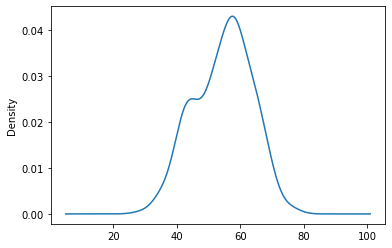

In [25]:
dataframe['age'].plot.density()

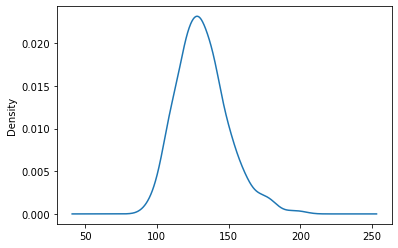

In [26]:
dataframe['trestbps'].plot.density()

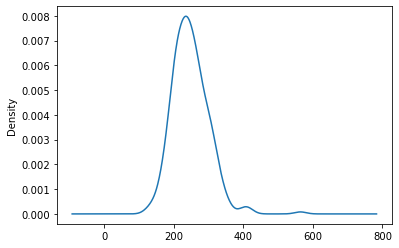

In [27]:
dataframe['chol'].plot.density()

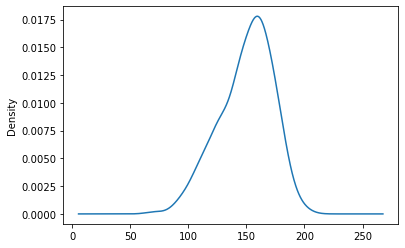

In [28]:
dataframe['thalach'].plot.density()

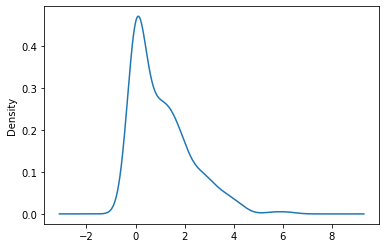

In [29]:
dataframe['oldpeak'].plot.density()

**Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson.**

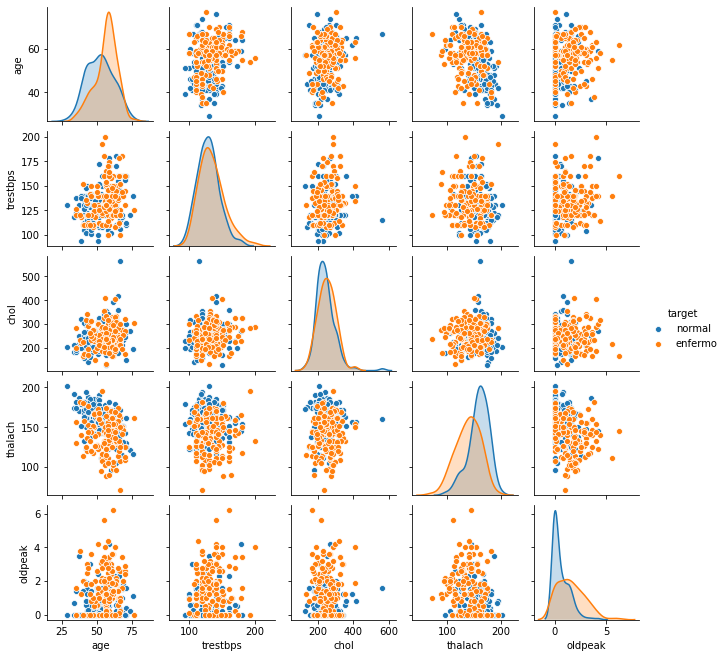

In [30]:
#Diagramas de dispersión
sns.pairplot(dataframe,hue='target',x_vars=['age','trestbps','chol','thalach','oldpeak'],y_vars=['age','trestbps','chol','thalach','oldpeak'],height=1.8)

 **¿Hay pares variables que separen bien las clases?**

No vemos una separacion evidente en los *clusters*. Dada la complejidad del caso, entendemos que su distribución y la relación de personas sanas y enfermas no sea clara.  
Visualmente podemos destacar dos relaciones que podrían tener *clusters* más diferenciados:  
- Por un lado, en `age` - `thalach` la tasa de mayor ppm corresponde al grupo de población de menor edad.  
- También vemos que las variables `oldpeak` - `thalach` estan algo separadas, aunque es bastante confuso. Esto se puede deber a que las personas que alcanzan una mayor tasa de ppm tienen arrojan un menor esfuerzo en el test de la prueba de esfuerzo.  

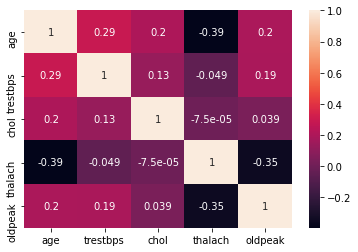

In [31]:
#Coeficientes de correlación de Pearson
sns.heatmap(dataframe.corr(method='pearson'), annot=True)

 **¿Hay correlaciones claras entre las variables?**

Del mismo modo que antes, las correlaciones entre variables no son claras aunque, al ser valores numéricos, son más fáciles de detectar. Efectivamente los mayores valores se corresponden con las que habíamos detectado en el diagrama de dispersión.  
- Aquí encontramos una tercera relación entre variables que tiene un valor alto (en comparación con los valores a los que nos enfrentamos en esta tabla). Es la relación `age` - `trestbps`, que indica que la edad influye, en cierta medida, en la presión sanguínea de una persona en reposo.

**¿Crees que va a ser un problema sencillo o complicado de resolver?**

Dada la dispersión y la baja correlación de los datos será un problema difícil.  
Sobretodo porque seguramente arroje niveles altos de ambigüedad en una predicción de enfermedades cardiovasculares.

## 3) Normalizar los datos

**Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.**

Dado que queremos construir un árbol de decisión, donde no se calculan distancias entre datos, no es necesario escalarlos ni estandarizarlos.

## 4) Profundidad óptima del árbol

**Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.**

**Como *sklearn* trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.**

*__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.*

In [32]:
#Datos de entrenamiento
data = dataframe.drop('target', axis=1).values
data_names = dataframe.drop('target', axis=1).columns

#Variable de salida
target = dataframe['target'].values
target_names = ['normal','enfermo']

In [36]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 14)
for md in max_depths: 
    clf_aux = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=md,criterion='entropy')
    # Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
    scores = cross_validate(clf_aux,data,target,scoring='accuracy', 
                            cv=10,return_train_score=True)
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9147059645592265,
  0.9513779417519146,
  0.9693414947733243,
  0.9850452792218682,
  0.9928936776790206,
  0.9981301358376655,
  0.9996268656716417,
  1.0,
  1.0],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7608045977011495,
  0.7571264367816093,
  0.7605747126436782,
  0.7540229885057471,
  0.7473563218390805,
  0.7641379310344828,
  0.7540229885057472,
  0.7608045977011495,
  0.7608045977011495,
  0.7608045977011495])

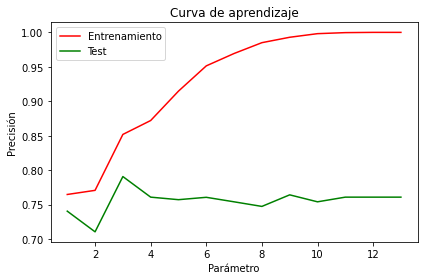

In [39]:
# Dibuja las lineas
plt.plot(max_depths, train_accuracy, color="r",  label="Entrenamiento")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Crea la tabla
plt.title("Curva de aprendizaje")
plt.xlabel("Parámetro"), plt.ylabel("Precisión"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Obtenemos, sin duda, el mejor valor para el conjunto de test en la profundidad 3.  
Lo que ocurre con la línea roja es que el conjunto de entrenamiento mejora a mayor profundidad hasta estancarse pero el conjunto de test representado con la línea verde empeora a partir de la profundidad 3. Esto se conoce como *sobre-entrenamiento*.

## 5) Analizando el árbol de decisión

**Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo.** 

In [40]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=3,criterion='entropy')
clf = clf.fit(data, target)

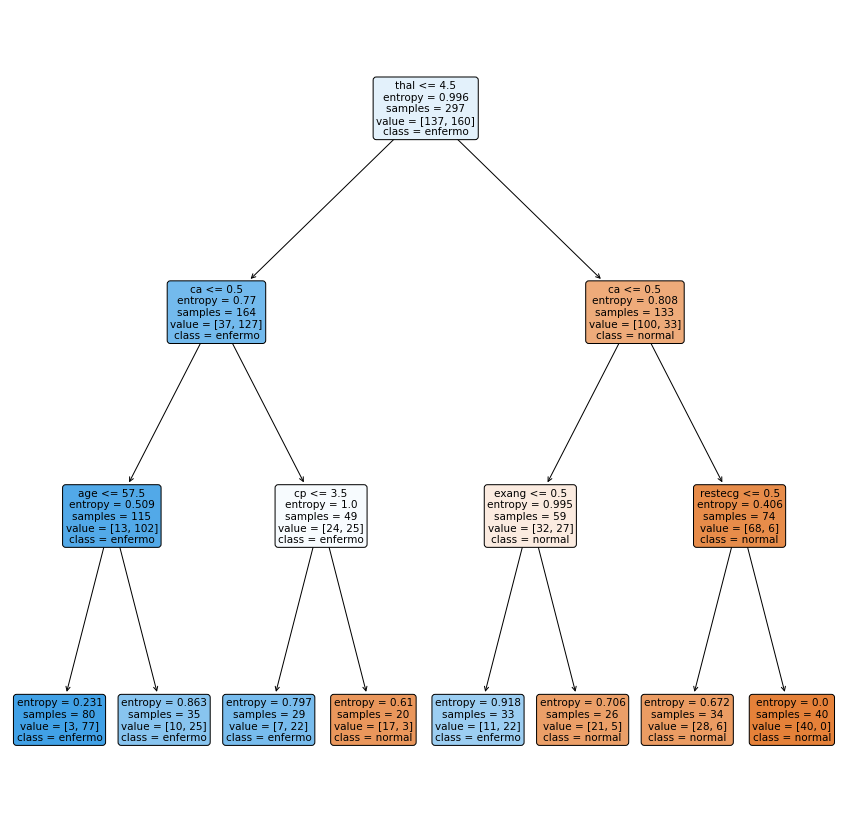

In [44]:
# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf,filled=True,feature_names=data_names,class_names=target_names,rounded=True)
plt.show()

**Analiza:**

- **¿Cuáles son las variables más importantes y en qué orden?**

Las variables más importantes son las que dividen el árbol en los primeros niveles de profundidad. A continuación de estas, en las distintas ramificaciones del árbol podemos ver cuál es la variable más importante de cada subconjunto.  
Para el conjunto completo, las variables más importantes son `thal` y `ca` respectivamente.

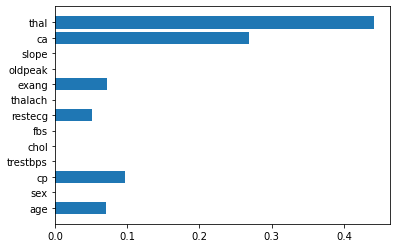

In [45]:
caract=dataframe.drop('target', axis=1).shape[1]
plt.barh(range(caract),clf.feature_importances_)
plt.yticks(np.arange(caract),dataframe.drop('target', axis=1).columns)
plt.show()

Hemos insertado la gráfica anterior para observar cuantitativamente cuáles son las variables más importantes de más a menos.

- **¿Hay variables del conjunto de datos que no se han usado?**

Dado que la profundidad del árbol es 3, la cantidad máxima de variables que podrían aparecer en el árbol sería 7.  
Han aparecido `thal`, `ca`, `exang`, `restecg`, `cp` y `age`. En este caso, han salido 6 variables diferentes porque, en el primer nivel de ambos subconjuntos, la variable más significativa es `ca`.  
No han aparecido `slope`, `oldpeak`, `fbs`, `chol`, `trestbps` ni `sex`.

- **¿Cuál sería la tasa de aciertos (*accuracy*) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?**

*Accuracy = (VP + VN) / (VP + VN + FP + FN)*  

Si solo hiciera una pregunta, tendría un nivel de profundidad. En este caso los valores necesarios para calcular la tasa de aciertos son:  
VP = 127, VN = 100, FP = 37 y FN = 33.  
Así que el valor de tasa de aciertos buscado es:  
**Accuracy =** (127 + 100) / (127 + 100 + 37 + 33) = 227 / 297 **= 0,76**

- **¿El árbol que hemos construido es capaz de separar las clases?**

Visualmente el árbol es bastante claro y muestra desde la primera ramificación una separación bastante nítida entre personas sanas y enfermas.  

Pero debemos ir más allá y valorar en los datos numéricos de los nodos:   
Las hojas de los extremos han clasificado muy bien a los pacientes, es decir, el número de pacientes que ha llegado a estar en esa hoja es, casi en su totalidad, de la misma clase.  
A medida que nos acercamos a las hojas del medio, vemos un mayor número de pacientes que no corresponden con la mayoría de los que han llegado a esa hoja. En este caso, es preferible la notificación de un falso positivo (en este árbol se dan 31 falsos positivos de 297 pacientes), ya que en ningún caso queremos que nuestro estudio concluya con falsos negativos (afortunadamente, en este árbol solo se dan 14 falsos negativos de 297 pacientes).

- **¿En cuál de los nodos hoja existe mayor confusión?**

Solo uno de ellos es claro: la hoja del extremo derecho. Posee una entropía de 0 y no aporta ningun falso negativo.  
La hoja de mayor confusión corresponde a la hoja del extremo izquierdo del semiárbol derecho. Su entropía es la más alta, con un valor de 0.918, y aporta 11 falsos positivos.

## 6) Estudiando el error

**Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes.**

In [46]:
# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, data, target, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


**¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?**

Dado que la precisión ponderada media (los positivos que se aciertan entre los que se predicen) es alta, con un 81%, y la exhaustividad ponderada media es un poco inferior al valor anterior, 79%, (los positivos que se aciertan entre los que realmente hay) podemos decir que nuestro clasificador es bastante efectivo pues son valores bastante altos.  
Es sorprendente observar como, a partir de un conjunto de datos que hemos visto bastante disperso y entremezclado, hemos conseguido obtener un clasificador con una efectividad bastante aceptable.

**Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión.**

In [56]:
# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=RANDOM_STATE)
predictions = cross_val_predict(clf,data,target,cv=10)

# Informe por clases
cr = classification_report(target,predictions,target_names=target_names)
print(cr)

              precision    recall  f1-score   support

      normal       0.82      0.71      0.76       137
     enfermo       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



In [57]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 97  40]
 [ 22 138]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

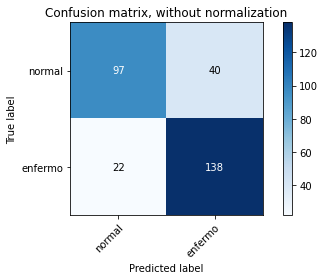

In [58]:
plot_confusion_matrix(target,predictions,target_names,normalize=False)

**¿Cómo se comporta nuestro clasificador en cada una de las clases?**

Con la clase *normal*, el selector consigue que más dos tercios del conjunto de personas sanas, el 70%, sean correctamente clasificadas.  
Con la clase *enfermo*, el selector consigue que el 86% de personas enfermas se clasifiquen como tal.  

Observando los valores de precisión y recall vemos que el clasificador es más preciso con la clase *normal* pero tiene un mayor recall para la clase *enfermo*. De media, es un poco más eficiente a la hora de determinar personas enfermas.  

Es importante una observación:  
Tenemos que rebajar al máximo el valor de falsos negativos. Si nuestra máquina considera a una persona enferma como sana, puede llegar a provocar pérdidas de tiempo, dinero y, lo más importante, de vidas.  
Es una buena noticia que el valor de recall sea alto para la clase *enfermo* pues es un indicador de que la tasa de falsos negativos es baja. También, analizando posteriormente la matriz de confusión, detectamos que hay 22 personas (un 12,5%) a las que se clasifica como sanas cuando están enfermas. Es un valor bajo, de hecho es el más bajo de la matriz de confusión, pero no es suficiente si queremos un algoritmo eficiente.

**Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.**

*En mi opinión, esta es una buena **herramienta** para los hospitales.*  

Actualmente, a la hora de analizar la salud cardiovascular de un paciente, los médicos estudian las variables que utilizamos en este clasificador para elaborar sus propios diagnósticos.  
Si utilizamos esta herramienta, que está basada en una población muestral bastante grande, podríamos generar un diagnóstico rápido con unas tasas de acierto bastante altas. Desde luego la herramienta necesitaría más trabajo y mejoras quizás en el tamaño de la población muestral.  
Pero si se quedase así, podría ayudar al diagnóstico del paciente despejando dudas al personal sanitario o indicando una dirección en la que basar la búsqueda del problema. Nunca como diagnóstico definitivo evidentemente pues no arroja tasas rotundas.

**Ventajas**
- Con tres sencillas preguntas se clasifica al paciente. 
- Su uso es de apoyo y no supone una gran pérdida de tiempo en el desarrollo del diagnóstico.
- Tiene tasas bastante altas de precisión en cuanto a la detección de personas enfermas.
- En una de sus hojas confirma con rotundidad a una persona sana.

**Desventajas**
- Está basado en una población de unas 300 personas, debería ampliarse a medida que se hace uso de él.
- Sus tasas de falsos positivos y falsos negativos no son nulas aunque tengan valores bajos.
- En ningún caso sustituye la labor de los profesionales sanitarios dado que genera valores estadísticos.
- En ninguna de sus hojas confirma con rotundidas a una persona enferma.